In [4]:
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

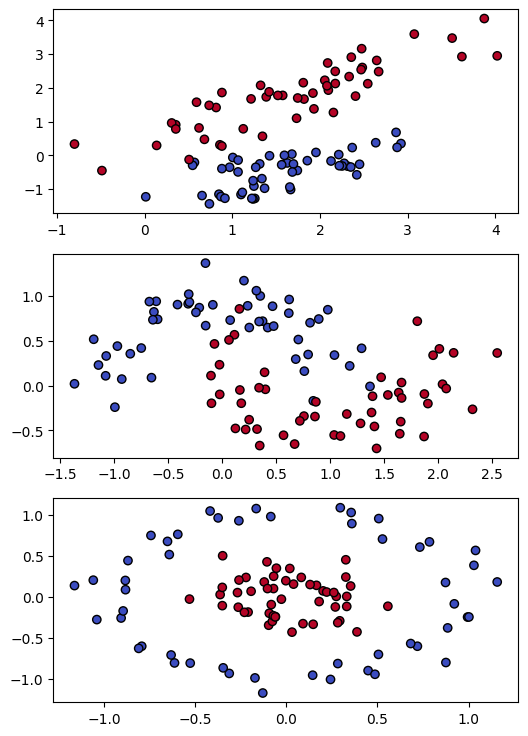

In [5]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42)
# plt.scatter(X[:, 0], X[:, 1], c = y
X += 1.2 * np.random.uniform(size=X.shape)
Xy = (X, y)

# X, y = make_moons(noise = 0.2, random_state=42)
# plt.scatter(X[:, 0], X[:, 1], c = y)

# X, y = make_circles(noise = 0.1, factor = 0.3, random_state=42)
# plt.scatter(X[:, 0], X[:, 1], c = y)

datasets = [
    Xy,
    make_moons(noise=0.2, random_state=42),
    make_circles(noise=0.1, factor=0.3, random_state=42)
]

fig = plt.figure(figsize=(6, 9))
i = 1

for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    ax = plt.subplot(len(datasets), 1, i)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="black")
    i += 1

plt.show()

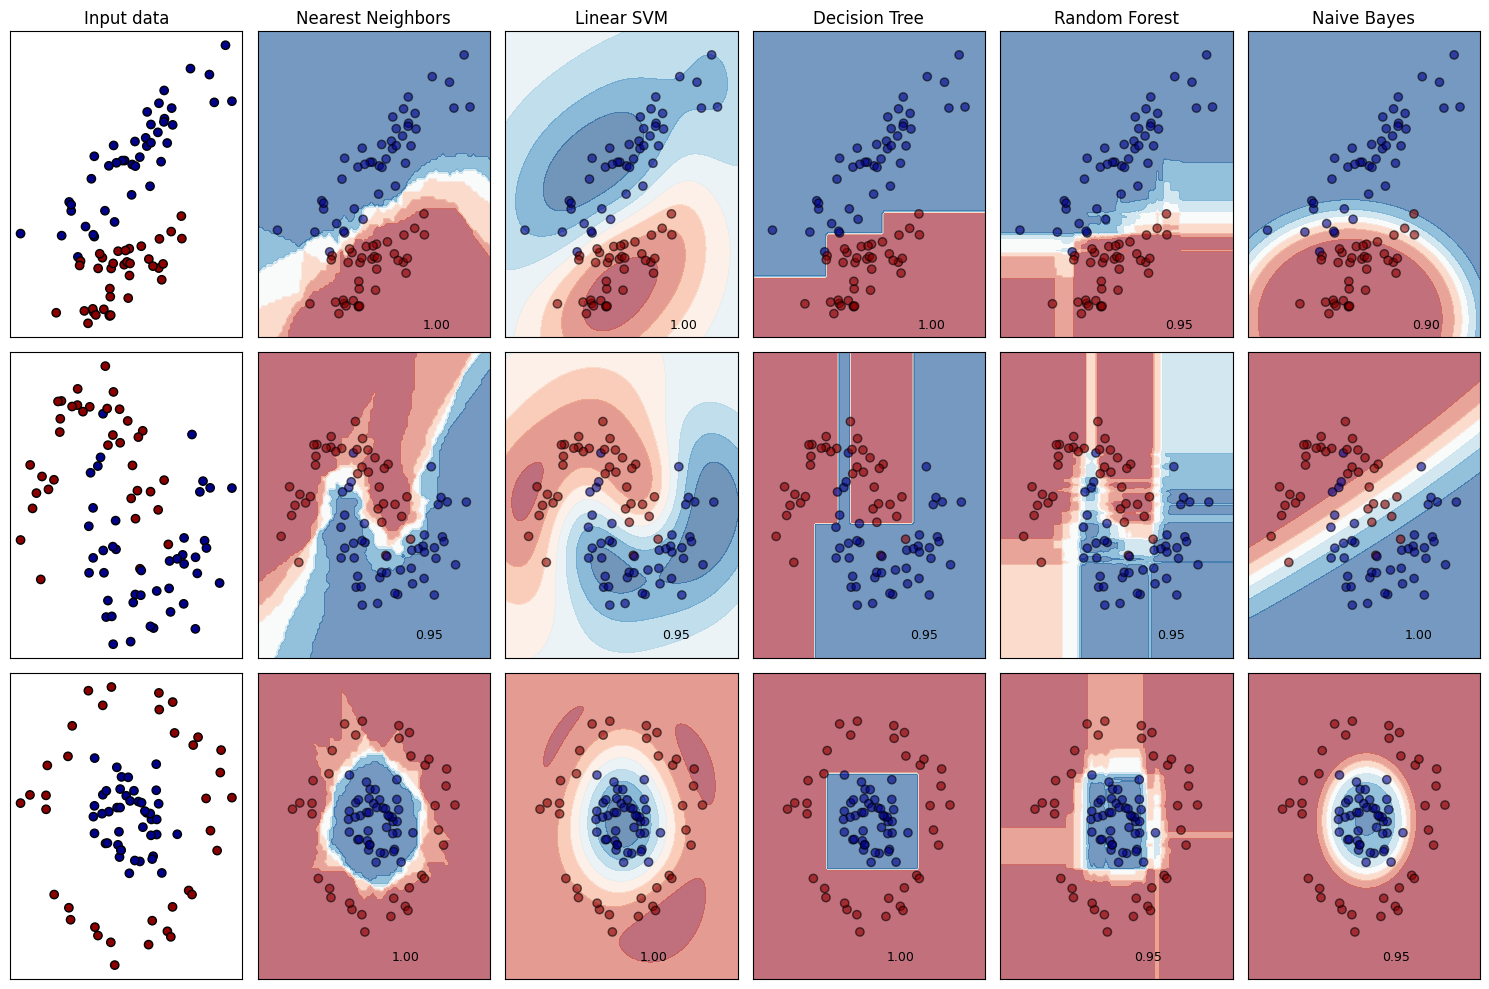

In [6]:
names = ["Nearest Neighbors", "Linear SVM", "Decision Tree", "Random Forest", "Naive Bayes"]
classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB()
]

fig, axes = plt.subplots(len(datasets), len(classifiers) + 1, figsize=(15, 10))


cm_bright = colors.ListedColormap(["darkred", "darkblue"])

for ds_idx, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    ax = axes[ds_idx, 0]
    ax.set_title("Input data" if ds_idx == 0 else "")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="black")
    ax.set_xticks([])
    ax.set_yticks([])

    for clf_idx, (name, clf) in enumerate(zip(names, classifiers)):
        ax = axes[ds_idx, clf_idx + 1]
        clf_pipe = make_pipeline(StandardScaler(), clf)
        clf_pipe.fit(X_train, y_train)
        score = clf_pipe.score(X_test, y_test)

        DecisionBoundaryDisplay.from_estimator(clf_pipe, X, cmap=plt.cm.RdBu, alpha=0.6, ax=ax, eps=0.5)
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="black", alpha=0.6)
        ax.set_xticks([])
        ax.set_yticks([])

        if ds_idx == 0:
            ax.set_title(name)
        ax.text(
            X[:, 0].max() - 0.5,
            X[:, 1].min() - 0.3,
            f"{score:.2f}",
            fontsize=9,
            ha="right"
        )

plt.tight_layout()
plt.show()
